#### This notebook investigates relations between income and rent.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from sklearn.linear_model import LinearRegression
from src.plots import plot_regression
from tueplots import bundles

In [2]:
income = pd.read_csv('../data/income.csv', index_col=0)
rent = pd.read_csv('../data/rent.csv', index_col=0)
rent_fs = pd.read_csv('../data/rent_federal_states.csv', index_col=0)

In [3]:
income_data = income['net income'].values
rent_data = rent.loc[2000:, 'rent'].values

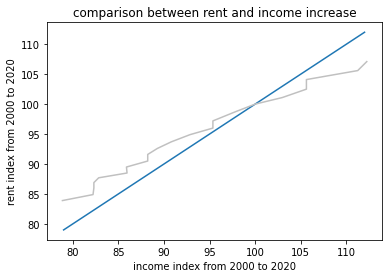

In [4]:
plt.plot(np.arange(79, 113, 1), np.arange(79, 113, 1))
plt.plot(income_data, rent_data, color='silver')
plt.xlabel('income index from 2000 to 2020')
plt.ylabel('rent index from 2000 to 2020')
plt.title('comparison between rent and income increase');

Check how income and rent increase as a function of years passed.

coef:  1.5877


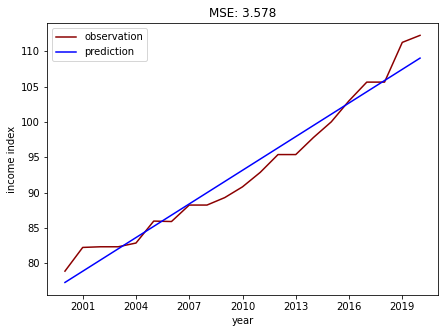

In [5]:
year_feature = income.index.values.reshape(-1 ,1)
observation_inc = income_data

fit = LinearRegression().fit(year_feature, observation_inc)
prediction_inc = fit.predict(year_feature)
coefs = fit.coef_
print('coef: ', round(coefs.item(), 4))

mse = np.mean((observation_inc - prediction_inc)**2)

plot_regression(observation_inc, prediction_inc, year_feature, 'MSE: ' + str(round(mse, 4)), ylabel='income index')

coef:  1.1405


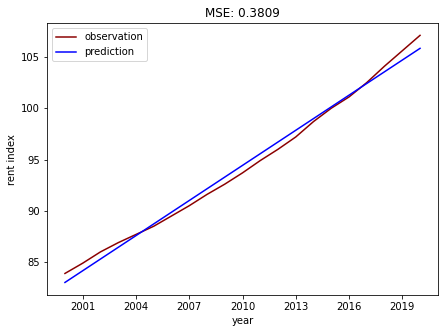

In [6]:
year_feature = income.index.values.reshape(-1 ,1)
observation_rent = rent_data

fit = LinearRegression().fit(year_feature, observation_rent)
prediction_rent = fit.predict(year_feature)
coefs = fit.coef_
print('coef: ', round(coefs.item(), 4))

mse = np.mean((observation_rent - prediction_rent)**2)

plot_regression(observation_rent, prediction_rent, year_feature, 'MSE: ' + str(round(mse, 4)))

While the net income in households increases by approximately 1.6% each year, rent only increases by approximately 1.14% each year. 

Compute regression on mean rent data over federal states.

coef:  1.0904


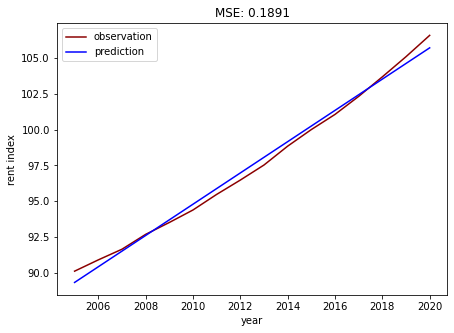

In [7]:
mean_rent_fs = rent_fs.mean(axis=1)

year_feature_fs = mean_rent_fs.index.values.reshape(-1 ,1)
observation_fs = mean_rent_fs

fit = LinearRegression().fit(year_feature_fs, observation_fs)
prediction_fs = fit.predict(year_feature_fs)
coefs = fit.coef_
print('coef: ', round(coefs.item(), 4))

mse = np.mean((observation_fs - prediction_fs)**2)

plot_regression(observation_fs, prediction_fs, year_feature_fs, 'MSE: ' + str(round(mse, 4)))

While the mean rent index over federal states slightly differs from the total index - probably due to different weighting of federal states taking population sizes into account -, the regression coefficient of 1.09 is close to the total rent coefficient computed above.

#### save relevant figures to fig

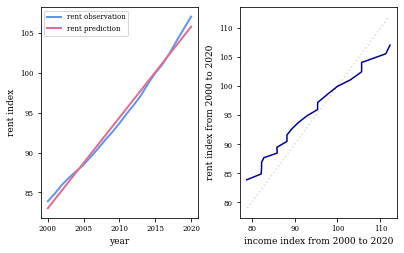

In [25]:
with plt.rc_context(bundles.neurips2021(usetex=False, family='serif')):

    fig, ax = plt.subplots(1, 2)

    ax[0].plot(year_feature, observation_rent, linewidth=2, color='cornflowerblue', label='rent observation')
    ax[0].plot(year_feature, prediction_rent, linewidth=2, color='palevioletred', label='rent prediction')
    ax[0].legend()
    ax[0].set_xlabel('year')
    ax[0].set_ylabel('rent index')

    ax[1].plot(np.arange(79, 113, 1), np.arange(79, 113, 1), linestyle='dotted', color='gainsboro')
    ax[1].plot(income_data, rent_data, color='darkblue')
    ax[1].set_xlabel('income index from 2000 to 2020')
    ax[1].set_ylabel('rent index from 2000 to 2020') 

plt.savefig('../fig/rent_income_exp_04.pdf', bbox_inches='tight')